### Modèle de regression linéaire

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. Ouvrir le fichier houses.csv
data = pd.read_csv("houses.csv")
data

size  nb_rooms  garden orientation         price
0    197.330478         1       0         Sud -5.156551e+05
1    185.361036         2       0         Sud  9.341416e+05
2    195.113286         3       0         Est  6.894269e+06
3    139.920144         3       1       Ouest  4.307298e+06
4    167.917466         1       0        Nord  1.267890e+06
..          ...       ...     ...         ...           ...
945  154.659477         3       1         Sud  5.587811e+06
946  276.866562         1       1         Sud -1.349292e+05
947  184.679199         1       1       Ouest  2.839957e+06
948   82.281477         1       0        Nord  3.114215e+06
949  125.081079         3       1         Sud  5.414860e+06

[950 rows x 5 columns]

In [3]:
data.columns

Index(['size', 'nb_rooms', 'garden', 'orientation', 'price'], dtype='object')

In [4]:
data.dtypes

size           float64
nb_rooms         int64
garden           int64
orientation     object
price          float64
dtype: object

In [5]:
# 2. Convertir les données en chiffres (orientation)
#from sklearn.preprocessing import LabelEncoder  

#le = LabelEncoder()
#data['orientation'] = le.fit_transform(data['orientation'])
data = pd.get_dummies(data, columns=['orientation'])

In [6]:
data.dtypes

size                 float64
nb_rooms               int64
garden                 int64
price                float64
orientation_Est        uint8
orientation_Nord       uint8
orientation_Ouest      uint8
orientation_Sud        uint8
dtype: object

In [7]:
#train, test = data.head(int(len(data)*0.8)), data.tail(int(len(data)*0.2)) 

In [8]:
data

size  nb_rooms  garden         price  orientation_Est  \
0    197.330478         1       0 -5.156551e+05                0   
1    185.361036         2       0  9.341416e+05                0   
2    195.113286         3       0  6.894269e+06                1   
3    139.920144         3       1  4.307298e+06                0   
4    167.917466         1       0  1.267890e+06                0   
..          ...       ...     ...           ...              ...   
945  154.659477         3       1  5.587811e+06                0   
946  276.866562         1       1 -1.349292e+05                0   
947  184.679199         1       1  2.839957e+06                0   
948   82.281477         1       0  3.114215e+06                0   
949  125.081079         3       1  5.414860e+06                0   

     orientation_Nord  orientation_Ouest  orientation_Sud  
0                   0                  0                1  
1                   0                  0                1  
2                   0                  0                0  
3                   0                  1                0  
4                   1                  0                0  
..                ...                ...              ...  
945                 0                  0                1  
946                 0                  0                1  
947                 0                  1                0  
948                 1                  0                0  
949                 0                  0                1  

[950 rows x 8 columns]

In [9]:
# 3. Découpage du data en 80% et 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2)
# data.drop('price', axis=1) permet de renvoyer la dataset sans la variable à expliquer

In [10]:
x_train

size  nb_rooms  garden  orientation_Est  orientation_Nord  \
399  145.780034         1       1                1                 0   
884   67.006862         3       0                0                 0   
711  178.495447         1       0                1                 0   
549  166.473727         3       0                0                 1   
545   99.282177         1       1                0                 1   
..          ...       ...     ...              ...               ...   
736  180.611250         1       0                0                 0   
610  201.351913         1       1                0                 0   
375  106.155289         1       0                0                 0   
335  199.797062         1       1                1                 0   
840  174.144839         3       1                1                 0   

     orientation_Ouest  orientation_Sud  
399                  0                0  
884                  0                1  
711                  0                0  
549                  0                0  
545                  0                0  
..                 ...              ...  
736                  1                0  
610                  0                1  
375                  0                1  
335                  0                0  
840                  0                0  

[760 rows x 7 columns]

In [11]:
y_train

399   -7.537287e+05
884    2.204152e+06
711    2.524531e+06
549    4.311763e+06
545    6.787953e+06
           ...     
736   -1.124160e+06
610   -8.068251e+05
375    3.751374e+06
335    4.543180e+06
840    1.250005e+07
Name: price, Length: 760, dtype: float64

In [12]:
# 4. Entrainement d'un algo de regression sur train
from sklearn.linear_model import LinearRegression
model = LinearRegression()
fit = model.fit(x_train, y_train)
fit

LinearRegression()

In [13]:
fit.coef_

array([   9122.3110254 ,  -31019.27270366, -465660.38952601,
        183854.06671767,  123959.30174459, -603739.74636876,
        295926.3779065 ])

In [14]:
predictions = model.predict(x_test)

In [15]:
predictions

array([3827124.0473518 , 3282545.13835323, 4151264.98856956,
       1358138.9632153 , 2776033.03731002, 2172583.28299409,
       3752751.89237925, 3106101.30184488, 3096538.49630666,
       2961188.77224052, 1546860.21424732, 2795411.11424333,
       3694117.70602911, 3847246.20747621, 2888155.19664313,
       3172744.76804569, 3773239.79953272, 3607550.2048434 ,
       2882095.77891404, 2626682.43246487, 3590776.86694604,
       3206392.59013292, 3345601.04837615, 3190624.35287083,
       2953886.24244301, 2808020.04809882, 2907522.66844309,
       3632375.69378619, 3268156.26421393, 3530658.56001667,
       2750263.60573156, 3935588.91323141, 3540902.83558937,
       3278376.63407385, 2787551.81547023, 3323423.34289084,
       3498318.7299137 , 3456917.567586  , 3446558.92345445,
       2579352.02598464, 2270353.5629391 , 2719675.77867298,
       2340993.39438087, 3474014.26363729, 3424777.76866763,
       2907537.14106596, 3858060.31908437, 2193901.03429272,
       3580104.60331771,

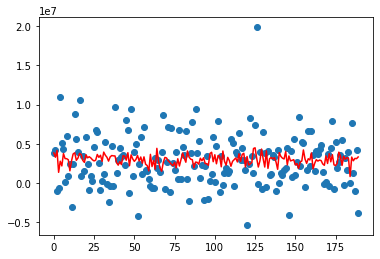

In [16]:

plt.scatter(range(len(x_test)), y_test)
plt.plot(predictions, c='red')
plt.draw()

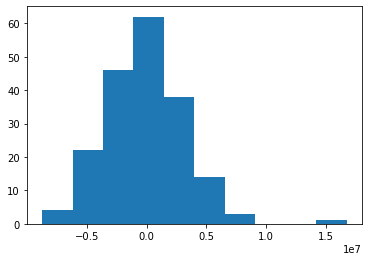

In [17]:
plt.hist(y_test - predictions)
plt.draw()

In [18]:
# Mean Absolute Error (MAE)
from sklearn import metrics

In [19]:
metrics.mean_absolute_error(y_test, predictions)

2588146.5152381244

In [20]:
# 6. Calcul du MSE : Min Score Error
metrics.mean_squared_error(y_test, predictions)

11069718516788.74

In [21]:
# Faire la comparaison entre le MSE de train et la MSE de test